In [140]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [141]:
import time
import pandas as pd
import numpy as np
start_time = time.perf_counter()


In [142]:
A = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data lin algebra/iris.data.csv")

In [143]:
A = A.drop('c5', axis=1)

In [144]:
np.array(A).shape

(150, 4)

In [145]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [146]:
standard_scaler = StandardScaler()
Ast = standard_scaler.fit_transform(A)
A_2 = pd.DataFrame(Ast, columns=A.columns)

print(A_2)

           c1        c2        c3        c4
0   -1.385353  0.337848 -1.398138 -1.312977
1   -1.506521  0.106445 -1.284407 -1.312977
2   -1.021849  1.263460 -1.341272 -1.312977
3   -0.537178  1.957669 -1.170675 -1.050031
4   -1.506521  0.800654 -1.341272 -1.181504
..        ...       ...       ...       ...
145  0.795669 -0.124958  0.819624  1.053537
146  0.432165  0.800654  0.933356  1.447956
147  0.068662 -0.124958  0.762759  0.790591
148 -0.900681  1.032057 -1.341272 -1.312977
149 -1.143017 -0.124958 -1.341272 -1.312977

[150 rows x 4 columns]


In [147]:
covariance_matrix = np.cov(Ast.transpose(), rowvar=True)
print(covariance_matrix)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [148]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [149]:
#p vector
X=[[0.52237162,-0.37231836],[-0.26335492,-0.92555649],[0.58125401,-0.02109478],[0.56561105,-0.06541577]]

print(X)

[[0.52237162, -0.37231836], [-0.26335492, -0.92555649], [0.58125401, -0.02109478], [0.56561105, -0.06541577]]


how to find good K<d
-------
Explained Variance
چه مقدار از کل واریانس داده‌ها را حفظ می‌کند.(واریانس توصیفی)
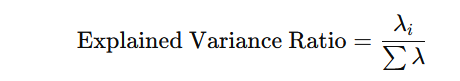
------------------------------------------------
 محاسبه واریانس تجمعی
  این آرایه نشان می‌دهد که با اضافه کردن هر مؤلفه‌ی اصلی، چه مقدار از واریانس داده‌ها حفظ می‌شود.





In [150]:
import numpy as np


explained_variance_ratio =  eigenvalues / np.sum( eigenvalues)

# محاسبه واریانس تجمعی
cumulative_variance = np.cumsum(explained_variance_ratio)

#  انتخاب K برای حفظ حداقل ۹۵٪ واریانس
k = np.argmax(cumulative_variance >= 0.95) + 1

#  نمایش نتایج
print("🔹 نسبت واریانس توضیح داده‌شده:")
print(explained_variance_ratio)

print("\n🔹 واریانس تجمعی:")
print(cumulative_variance)

print(f"\n تعداد مؤلفه‌های اصلی انتخاب‌شده (K) برای حفظ ۹۵٪ واریانس: {k}")



🔹 نسبت واریانس توضیح داده‌شده:
[0.72770452 0.23030523 0.03683832 0.00515193]

🔹 واریانس تجمعی:
[0.72770452 0.95800975 0.99484807 1.        ]

 تعداد مؤلفه‌های اصلی انتخاب‌شده (K) برای حفظ ۹۵٪ واریانس: 2


In [151]:
#new dimension
X=np.array(X)
A_new=np.dot(Ast,X)

end_time = time.perf_counter()
totaltime=end_time-start_time
print(totaltime)

0.4593327889997454


In [152]:
A_new.shape

(150, 2)

diemesnion reduced to 2 (from 4)

In [153]:
norm2 = np.linalg.norm(Ast)
norm2_2 = np.linalg.norm(A_new)
print(norm2_2,norm2)


23.975109050484427 24.494897427831784



# **compare with library**


In [154]:

start_time = time.perf_counter()

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
A_new2 = pca.fit_transform(Ast)

end_time = time.perf_counter()
tot=end_time-start_time
print(tot)

0.0019394470000406727


In [155]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

Y =Ast

pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)

Y_reconstructed = pca.inverse_transform(Y_pca)

mse = mean_squared_error(Y, Y_reconstructed)
print("خطای بازسازی (MSE):", mse)



خطای بازسازی (MSE): 0.04199024638518026


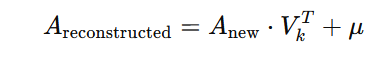

In [156]:

  mean_vector = np.mean(Ast, axis=0)\

  #μ is the mean vector of shape (1×n), where each element represents the mean of a feature across all samples.




In [157]:
centered_data = Ast- mean_vector
 #Center the Data

In [158]:
  reconstructed_data = np.dot(A_new, X.T) + mean_vector


In [159]:
mse = mean_squared_error(Ast, reconstructed_data)
print(mse)

0.04199024638518034


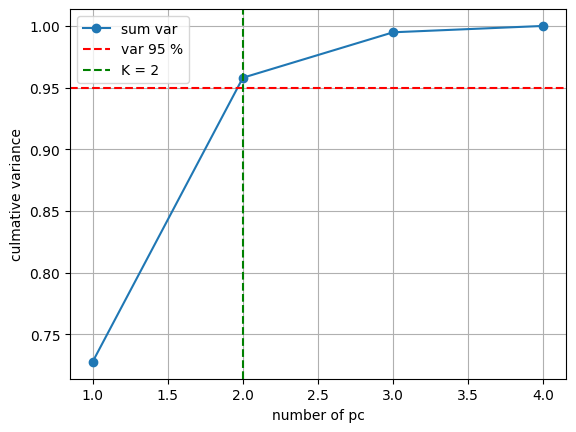

In [160]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratio = eigenvalues / np.sum( eigenvalues)

cumulative_variance = np.cumsum(explained_variance_ratio)

k = np.argmax(cumulative_variance >= 0.95) + 1

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label="sum var")
plt.axhline(y=0.95, color='r', linestyle='--', label="var 95 %")
plt.axvline(x=k, color='g', linestyle='--', label=f"K = {k}")
plt.xlabel("number of pc")
plt.ylabel("culmative variance")
plt.legend()
plt.grid()
plt.show()
